This is the template for the image recognition exercise. <Br>
Some **general instructions**, read these carefully:
 - The final assignment is returned as a clear and understandable *report*
    - define shortly the concepts and explain the phases you use
    - use the Markdown feature of the notebook for larger explanations
 - return your output as a *working* Jupyter notebook
 - name your file as Exercise_MLPR2023_Partx_uuid.jpynb
    - use the uuid code determined below
    - use this same code for each part of the assignment
 - write easily readable code with comments     
     - if you exploit code from web, provide a reference
 - it is ok to discuss with a friend about the assignment. But it is not ok to copy someone's work. Everyone should submit their own implementation
     - in case of identical submissions, both submissions are failed 

**Deadlines:**
- Part 1: Mon 6.2 at 23:59**
- Part 2: Mon 20.2 at 23:59**
- Part 3: Mon 6.3 at 23:59**

**No extensions for the deadlines** <br>
- after each deadline, example results are given, and it is not possible to submit anymore

**If you encounter problems, Google first and if you can’t find an answer, ask for help**
- Moodle area for questions
- pekavir@utu.fi
- teacher available for questions on Mondays 30.1, 13.2 (after lecture) and Thursday 2.3 (at lecture)

**Grading**

The exercise covers a part of the grading in this course. The course exam has 5 questions, 6 points of each. Exercise gives 6 points, i.e. the total score is 36 points.

From the template below, you can see how many exercise points can be acquired from each task. Exam points are given according to the table below: <br>
<br>
7 exercise points: 1 exam point <br>
8 exercise points: 2 exam points <br>
9 exercise points: 3 exam points <br>
10 exercise points: 4 exam points <br>
11 exercise points: 5 exam points <br>
12 exercise points: 6 exam points <br>
<br>
To pass the exercise, you need at least 7 exercise points, and at least 1 exercise point from each Part.
    
Each student will grade one submission from a peer and their own submission. After each Part deadline, example results are given. Study them carefully and perform the grading according to the given instructions. Mean value from the peer grading and self-grading is used for the final points. 

In [58]:
import uuid

# Run this cell only once and save the code. Use the same id code for each Part.
# Printing random id using uuid1()
# print ("The id code is: ",end="")
# print (uuid.uuid1())


# Introduction (1 p)

Write an introductory chapter for your report
<br>
- Explain what is the purpose of this task?
- Describe, what kind of data were used? Where did it originate? Give correct reference.
- Which methods did you use?
- Describe shortly the results

# Part 2

Data exploration and model selection

# Part 3

## Performance estimation (2 p)

Use the previously gathered data (again, use the standardized features). <br>
Estimate the performance of each model using nested cross validation. Use 10-fold cross validation for outer and <br>
5-fold repeated cross validation with 3 repetitions for inner loop.  <br> 
Select the best model in the inner loop using the hyperparameter combinations and ranges defined in the Part 2. <br>
For each model, calculate the accuracy and the confusion matrix. <br> 
Which hyperparameter/hyperparameter combination is most often chosen as the best one for each classifier? 

In [59]:
import joblib
import numpy
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from statistics import mean
from statistics import stdev


In [60]:
best_params_score_model_kNN = joblib.load(filename="./best_model_kNN.joblib")
best_params_score_model_RFC = joblib.load(filename="./best_model_rfc.joblib")
best_params_score_model_MLP = joblib.load(filename="./best_model_mlp.joblib")

X_train = joblib.load(filename="./X_train.joblib")
Y_train = joblib.load(filename="./Y_train.joblib")


In [61]:
# Preparing cross-validation validator with given parameters for outer loop
cv_outer = KFold(n_splits=10, shuffle=True)


In [62]:
# Function for running GridSearch. This can be used with all classifiers.

def execute_GridSearch(outer_results, train_outer_X, test_outer_X, model, space):
    # Split the data
    X_train_inner, X_test_inner = X_train[train_outer_X, :], X_train[test_outer_X, :]
    Y_train_inner, Y_test_inner = Y_train[train_outer_X], Y_train[test_outer_X]

    # Preparing cross-validation validator with given parameters for outer loop
    cv_inner = RepeatedKFold(n_splits=5, n_repeats=3)

    # configure GridSearch
    search = GridSearchCV(model, space, scoring="accuracy", cv=cv_inner, refit=True)

    result = search.fit(X_train_inner, Y_train_inner)

    # Refitted best model
    best_performing_model = result.best_estimator_

    # Evaluate the selected model
    prediction = best_performing_model.predict(X_test_inner)
    accuracy = accuracy_score(Y_test_inner, prediction)
    outer_results.append(accuracy)

    confusion_matrix(Y_test_inner, prediction)
    ConfusionMatrixDisplay.from_predictions(Y_test_inner, prediction, colorbar=False, )
    plt.show()

    # report progress
    print("Score for: ", model.__class__.__name__)
    print(
        "> Accuracy = %.3f, Mean CV-score = %.3f" % (accuracy, result.best_score_),
        "\n" "Best parameters =  %s" % (result.best_params_),
    )
    print()


In [69]:
len(test_outer_X)

30

In [66]:
len(X_train)

300

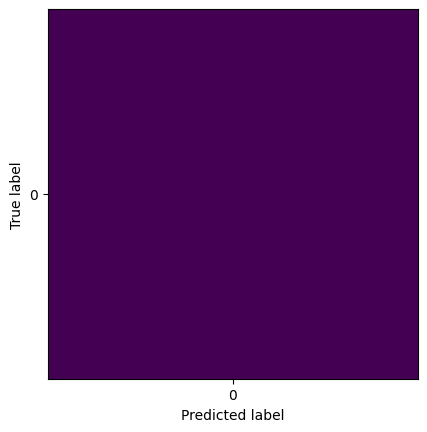

Score for:  KNeighborsClassifier
> Accuracy = 1.000, Mean CV-score = 0.941 
Best parameters =  {'n_neighbors': 4}



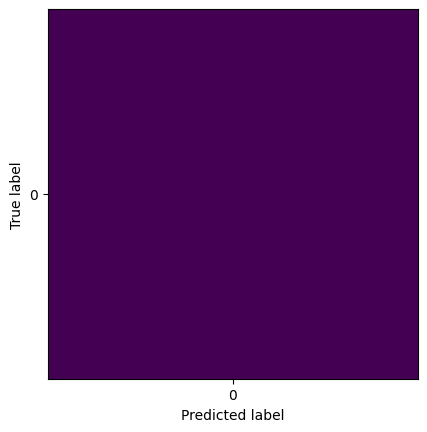

Score for:  KNeighborsClassifier
> Accuracy = 1.000, Mean CV-score = 0.947 
Best parameters =  {'n_neighbors': 4}



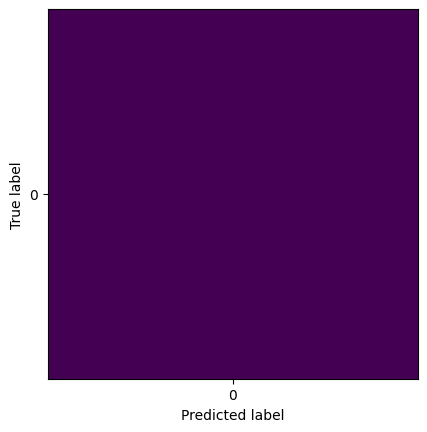

Score for:  KNeighborsClassifier
> Accuracy = 1.000, Mean CV-score = 0.949 
Best parameters =  {'n_neighbors': 4}



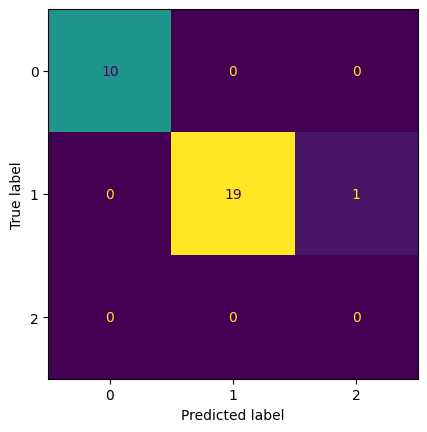

Score for:  KNeighborsClassifier
> Accuracy = 0.967, Mean CV-score = 0.954 
Best parameters =  {'n_neighbors': 3}



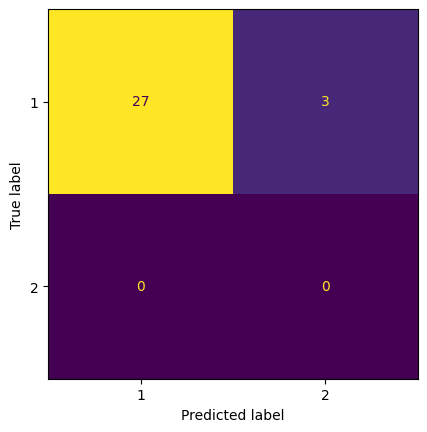

Score for:  KNeighborsClassifier
> Accuracy = 0.900, Mean CV-score = 0.958 
Best parameters =  {'n_neighbors': 2}



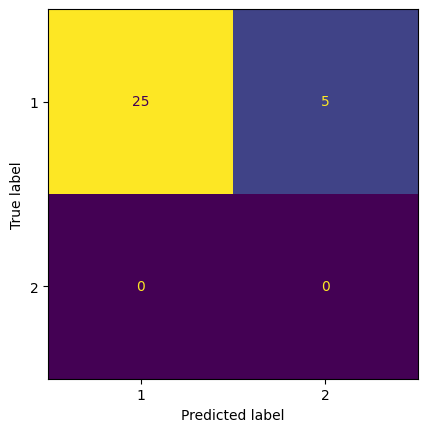

Score for:  KNeighborsClassifier
> Accuracy = 0.833, Mean CV-score = 0.960 
Best parameters =  {'n_neighbors': 3}



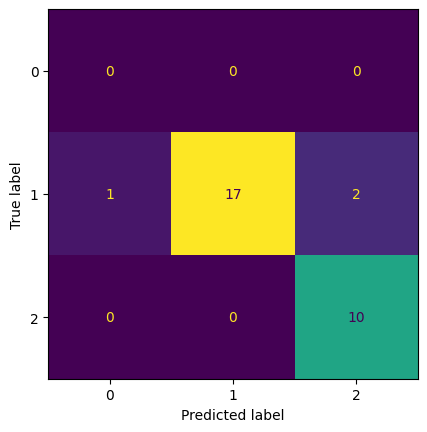

Score for:  KNeighborsClassifier
> Accuracy = 0.900, Mean CV-score = 0.959 
Best parameters =  {'n_neighbors': 3}



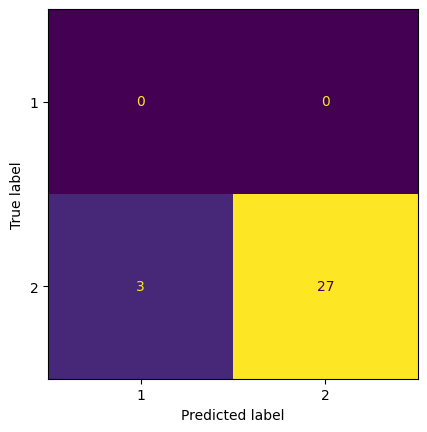

Score for:  KNeighborsClassifier
> Accuracy = 0.900, Mean CV-score = 0.946 
Best parameters =  {'n_neighbors': 1}



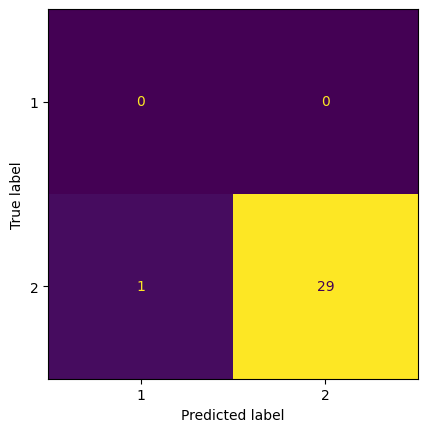

Score for:  KNeighborsClassifier
> Accuracy = 0.967, Mean CV-score = 0.957 
Best parameters =  {'n_neighbors': 3}



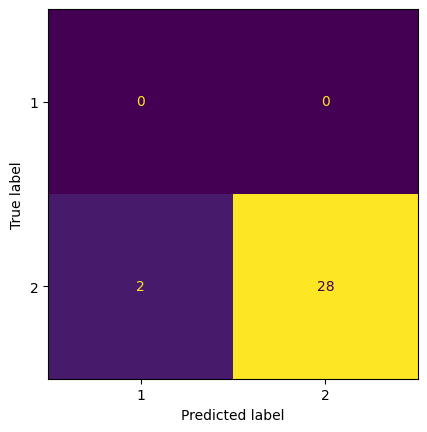

Score for:  KNeighborsClassifier
> Accuracy = 0.933, Mean CV-score = 0.944 
Best parameters =  {'n_neighbors': 3}

Accuracy for kNN: 0.940 (0.056)


In [63]:
# Select best model for kNN

outer_results = list()

for train_outer_X, test_outer_X in cv_outer.split(X_train):
    # define model and search space for kNN
    model_kNN = KNeighborsClassifier()
    space_kNN = dict()
    space_kNN["n_neighbors"] = [i for i in range(1, 16)]

    execute_GridSearch(outer_results, train_outer_X, test_outer_X, model_kNN, space_kNN)

# summarize the estimated performance of the model
print("Accuracy for kNN: %.3f (%.3f)" % (mean(outer_results), stdev(outer_results)))


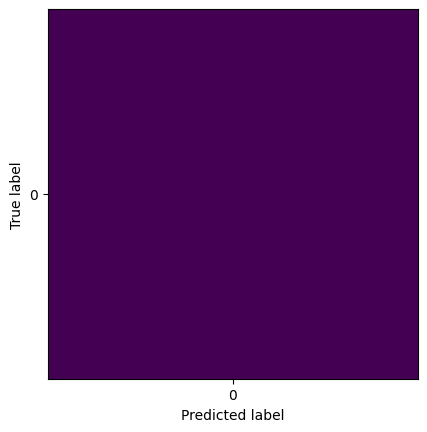

Score for:  RandomForestClassifier
> Accuracy = 1.000, Mean CV-score = 0.974 
Best parameters =  {'max_depth': 6, 'max_features': 4}



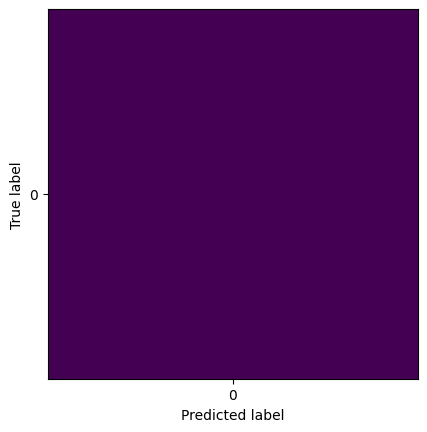

Score for:  RandomForestClassifier
> Accuracy = 1.000, Mean CV-score = 0.975 
Best parameters =  {'max_depth': 7, 'max_features': 5}



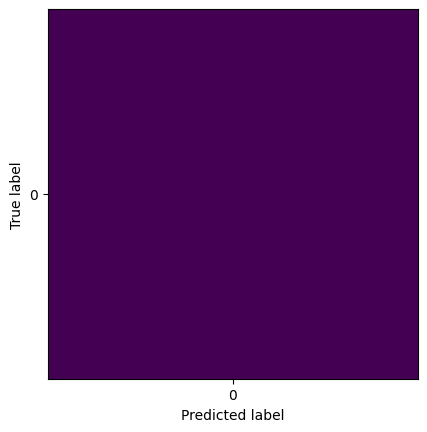

Score for:  RandomForestClassifier
> Accuracy = 1.000, Mean CV-score = 0.978 
Best parameters =  {'max_depth': 6, 'max_features': 4}



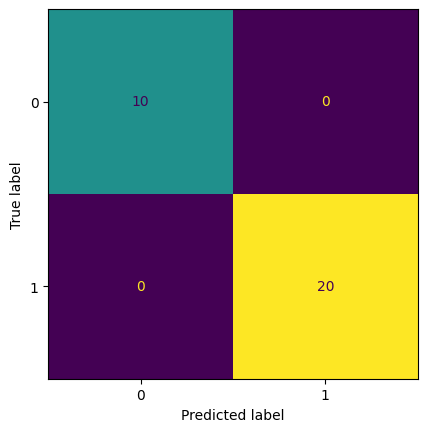

Score for:  RandomForestClassifier
> Accuracy = 1.000, Mean CV-score = 0.974 
Best parameters =  {'max_depth': 6, 'max_features': 4}



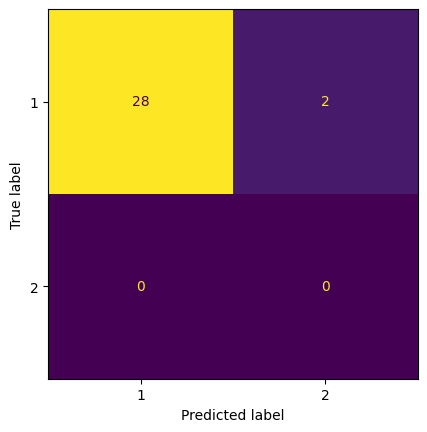

Score for:  RandomForestClassifier
> Accuracy = 0.933, Mean CV-score = 0.981 
Best parameters =  {'max_depth': 4, 'max_features': 4}



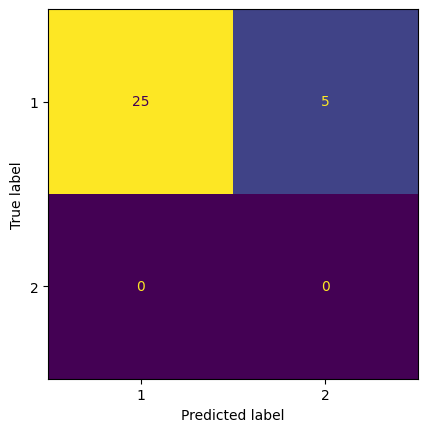

Score for:  RandomForestClassifier
> Accuracy = 0.833, Mean CV-score = 0.983 
Best parameters =  {'max_depth': 6, 'max_features': 5}



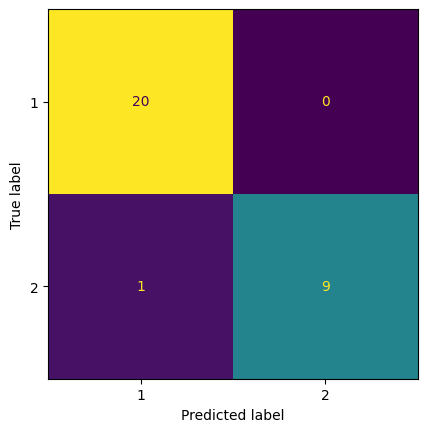

Score for:  RandomForestClassifier
> Accuracy = 0.967, Mean CV-score = 0.980 
Best parameters =  {'max_depth': 5, 'max_features': 6}



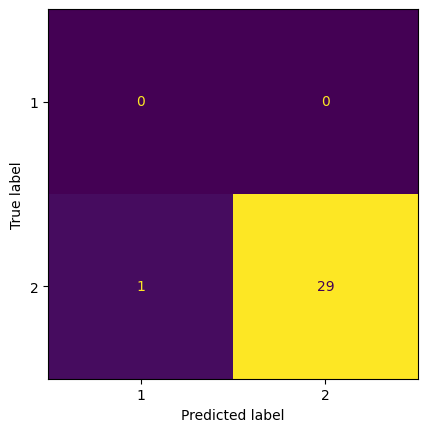

Score for:  RandomForestClassifier
> Accuracy = 0.967, Mean CV-score = 0.981 
Best parameters =  {'max_depth': 7, 'max_features': 3}



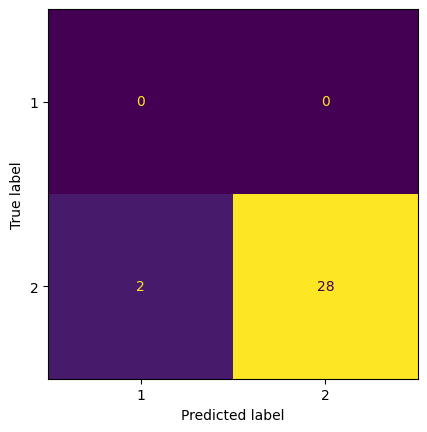

Score for:  RandomForestClassifier
> Accuracy = 0.933, Mean CV-score = 0.979 
Best parameters =  {'max_depth': 7, 'max_features': 4}



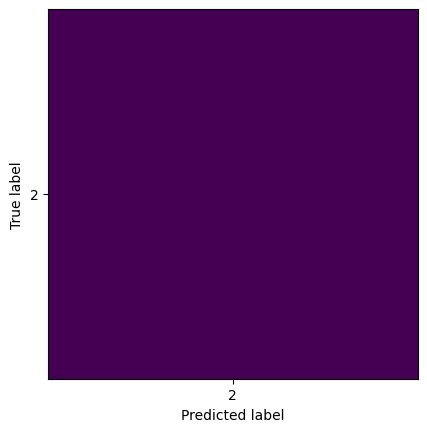

Score for:  RandomForestClassifier
> Accuracy = 1.000, Mean CV-score = 0.973 
Best parameters =  {'max_depth': 6, 'max_features': 6}

Accuracy for RFC: 0.963 (0.053)


In [64]:
# Select best model for RFC

outer_results = list()

for train_outer_X, test_outer_X in cv_outer.split(X_train):
    # define model and search space for RandomForestClassifier
    model_RFC = RandomForestClassifier()
    space_RFC = dict()
    space_RFC["max_features"] = [i for i in range(1, 8)]
    space_RFC["max_depth"] = [i for i in range(1, 8)] + [None]

    execute_GridSearch(outer_results, train_outer_X, test_outer_X, model_RFC, space_RFC)

# summarize the estimated performance of the model
print("Accuracy for RFC: %.3f (%.3f)" % (mean(outer_results), stdev(outer_results)))


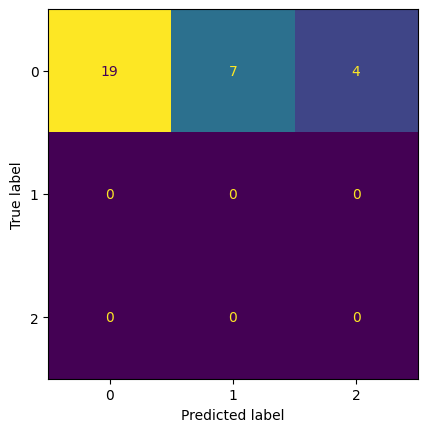

Score for:  MLPClassifier
> Accuracy = 0.633, Mean CV-score = 0.722 
Best parameters =  {'activation': 'relu', 'early_stopping': True, 'hidden_layer_sizes': 12, 'max_iter': 2000, 'solver': 'adam', 'validation_fraction': 0.5}



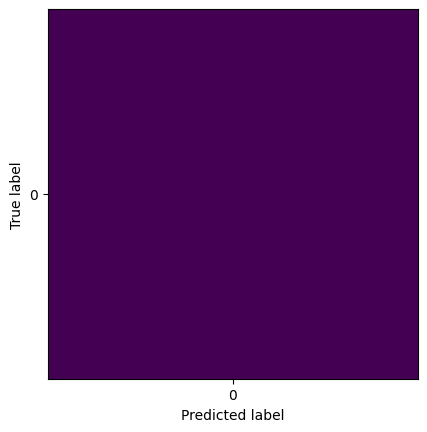

Score for:  MLPClassifier
> Accuracy = 1.000, Mean CV-score = 0.749 
Best parameters =  {'activation': 'relu', 'early_stopping': True, 'hidden_layer_sizes': 13, 'max_iter': 2000, 'solver': 'adam', 'validation_fraction': 0.5}



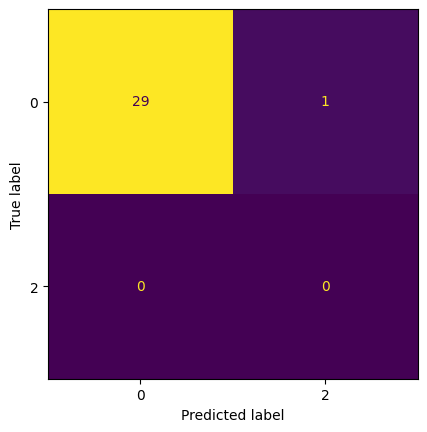

Score for:  MLPClassifier
> Accuracy = 0.967, Mean CV-score = 0.751 
Best parameters =  {'activation': 'relu', 'early_stopping': True, 'hidden_layer_sizes': 12, 'max_iter': 2000, 'solver': 'adam', 'validation_fraction': 0.5}



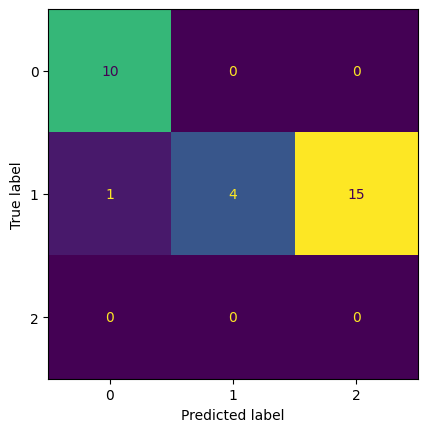

Score for:  MLPClassifier
> Accuracy = 0.467, Mean CV-score = 0.737 
Best parameters =  {'activation': 'relu', 'early_stopping': True, 'hidden_layer_sizes': 10, 'max_iter': 2000, 'solver': 'adam', 'validation_fraction': 0.5}



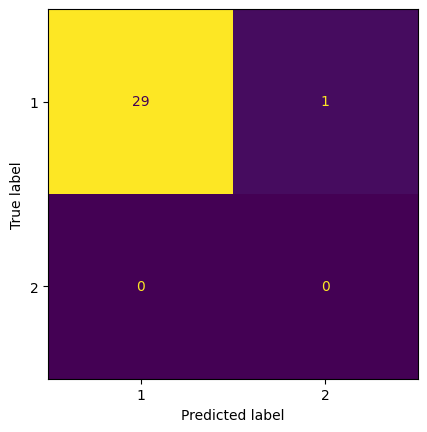

Score for:  MLPClassifier
> Accuracy = 0.967, Mean CV-score = 0.780 
Best parameters =  {'activation': 'relu', 'early_stopping': True, 'hidden_layer_sizes': 15, 'max_iter': 2000, 'solver': 'adam', 'validation_fraction': 0.5}



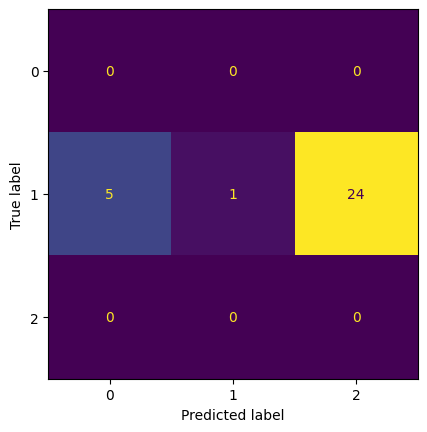

Score for:  MLPClassifier
> Accuracy = 0.033, Mean CV-score = 0.764 
Best parameters =  {'activation': 'relu', 'early_stopping': True, 'hidden_layer_sizes': 15, 'max_iter': 2000, 'solver': 'adam', 'validation_fraction': 0.5}



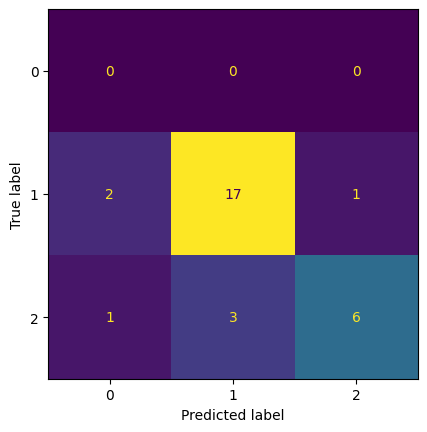

Score for:  MLPClassifier
> Accuracy = 0.767, Mean CV-score = 0.747 
Best parameters =  {'activation': 'relu', 'early_stopping': True, 'hidden_layer_sizes': 14, 'max_iter': 2000, 'solver': 'adam', 'validation_fraction': 0.5}



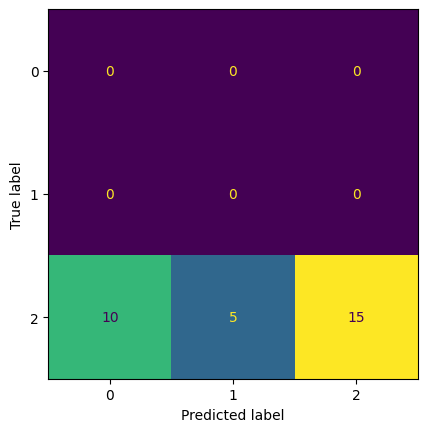

Score for:  MLPClassifier
> Accuracy = 0.500, Mean CV-score = 0.764 
Best parameters =  {'activation': 'relu', 'early_stopping': True, 'hidden_layer_sizes': 14, 'max_iter': 2000, 'solver': 'adam', 'validation_fraction': 0.5}



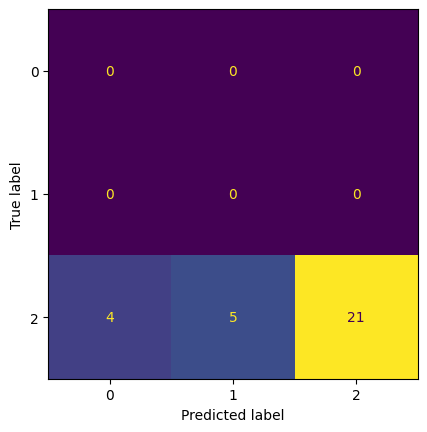

Score for:  MLPClassifier
> Accuracy = 0.700, Mean CV-score = 0.760 
Best parameters =  {'activation': 'relu', 'early_stopping': True, 'hidden_layer_sizes': 13, 'max_iter': 2000, 'solver': 'adam', 'validation_fraction': 0.5}



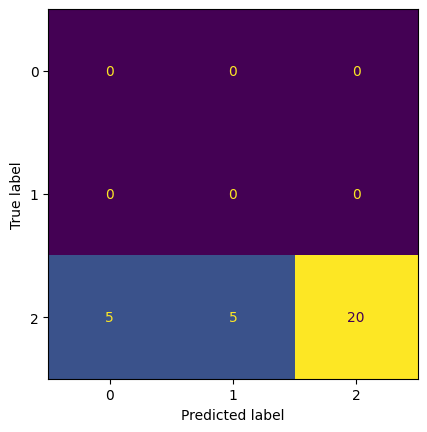

Score for:  MLPClassifier
> Accuracy = 0.667, Mean CV-score = 0.795 
Best parameters =  {'activation': 'relu', 'early_stopping': True, 'hidden_layer_sizes': 14, 'max_iter': 2000, 'solver': 'adam', 'validation_fraction': 0.5}

Accuracy for RFC: 0.670 (0.293)


In [65]:
# Select best model for MLP

outer_results = list()

for train_outer_X, test_outer_X in cv_outer.split(X_train):
    # define model and search space for MLP
    model_MLP = MLPClassifier()
    space_MLP = dict()
    space_MLP["hidden_layer_sizes"] = [i for i in range(1, 16)]
    space_MLP["activation"] = ["logistic", "relu"]
    space_MLP["solver"] = ["sgd", "adam"]
    space_MLP["early_stopping"] = [True]
    space_MLP["validation_fraction"] = [0.1, 0.5]
    space_MLP["max_iter"] = [2000]

    execute_GridSearch(outer_results, train_outer_X, test_outer_X, model_MLP, space_MLP)

# summarize the estimated performance of the model
print("Accuracy for MLP: %.3f (%.3f)" % (mean(outer_results), stdev(outer_results)))


## Discussion (2 p)

Discuss you results

- Which model performs the best? Why?
- Ponder the limitations and generalization of the models. How well will the classifiers perform for data outside this data set?
- Compare your results with the original article. Are they comparable?
- Ponder applications for these type of models (classifying rice or other plant species), who could benefit from them? Ponder also what would be interesting to study more on this area?
- What did you learn? What was difficult? Could you improve your own working process in some way?